### Avaliação de modelos

Nos problemas de aprendizado supervisionado, após o treinamento de um modelo, é essencial avaliar seu desempenho de forma criteriosa. Os métodos de avaliação de modelos têm como objetivo medir o quão bem o modelo consegue aprender os padrões presentes nos dados de treinamento e, principalmente, o quanto ele é capaz de generalizar para novos dados não vistos.

A avaliação de modelos envolve a utilização de estratégias e métricas adequadas ao tipo de tarefa — classificação ou regressão. Para isso, o conjunto de dados costuma ser dividido em subconjuntos de treinamento, validação e teste, ou avaliado por meio de técnicas como a validação cruzada, que permitem estimar o desempenho do modelo de forma mais robusta e menos sensível a variações específicas dos dados.

Entre os principais métodos de avaliação estão as métricas de desempenho, como acurácia, precisão, revocação e F1-score em problemas de classificação, e erro médio absoluto (MAE), erro quadrático médio (MSE) e coeficiente de determinação (R²) em problemas de regressão. Além disso, ferramentas como a matriz de confusão e curvas como ROC e Precision-Recall fornecem uma visão mais detalhada do comportamento do modelo frente às diferentes classes.

Uma avaliação adequada é fundamental para comparar modelos, ajustar hiperparâmetros e identificar problemas como overfitting e underfitting. Dessa forma, os métodos de avaliação desempenham um papel central no desenvolvimento de soluções de aprendizado supervisionado confiáveis, interpretáveis e eficazes.

In [5]:
#valores reais
reais = [100000, 150000, 200000, 250000, 300000]

#Valores previstos pelo modelo
prev= [95000, 142000, 210000, 245000, 315000]

1. MSE

O MSE (Mean Squared Error), ou Erro Quadrático Médio, é uma métrica usada para avaliar o desempenho de modelos de regressão em aprendizado supervisionado.

Ele mede a média dos quadrados das diferenças entre os valores reais e os valores previstos pelo modelo. Em termos simples, indica o quanto as previsões do modelo se afastam dos valores verdadeiros, penalizando mais fortemente erros grandes.

Principais características do MSE:

- Sempre não negativo (quanto menor, melhor).
- Penaliza erros grandes devido ao termo ao quadrado.
- É sensível a outliers, pois grandes desvios têm impacto elevado.
- A unidade do MSE é o quadrado da unidade da variável alvo, o que pode dificultar a interpretação direta.

Por causa dessa última característica, muitas vezes utiliza-se o RMSE (Root Mean Squared Error), que é a raiz quadrada do MSE e retorna o erro na mesma unidade da variável original.

In [ ]:
from sklearn.metrics import mean_squared_error

In [6]:
mse = mean_squared_error(reais, prev)
print("MSE:", mse)

MSE: 87800000.0


2. RMSE

O RMSE (Root Mean Squared Error), ou Raiz do Erro Quadrático Médio, é uma métrica usada para avaliar o desempenho de modelos de regressão em aprendizado supervisionado.

Ele é obtido a partir da raiz quadrada do MSE, o que faz com que o erro volte para a mesma unidade da variável alvo, tornando sua interpretação mais intuitiva.

Principais características do RMSE:
- Quanto menor, melhor o desempenho do modelo.
- Penaliza erros grandes de forma mais severa do que métricas baseadas em erro absoluto.
- É sensível a outliers.
- Fácil de interpretar por estar na mesma escala dos dados originais.

Diferença entre MSE e RMSE:

- MSE eleva os erros ao quadrado e retorna uma medida na escala ao quadrado.
- O RMSE aplica a raiz quadrada ao MSE, tornando o valor mais interpretável.

Em resumo, o RMSE é amplamente utilizado quando se deseja uma métrica que combine sensibilidade a grandes erros com facilidade de interpretação em problemas de regressão.

In [ ]:
import numpy as np

In [13]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 9370.165420097983


3. MAPE

O MAPE (Mean Absolute Percentage Error), ou Erro Percentual Absoluto Médio, é uma métrica usada para avaliar modelos de regressão, especialmente quando se deseja interpretar o erro em termos percentuais.

Ele mede a média do erro absoluto entre os valores reais e os valores previstos. 

Principais características do MAPE:
- O resultado é dado em %, o que facilita a interpretação.
- Quanto menor, melhor o desempenho do modelo.
- É intuitivo para comunicar resultados a públicos não técnicos.
- Dá a mesma importância relativa aos erros, independentemente da escala dos dados.

Limitações importantes:
- Não pode ser usado quando 𝑦𝑖 = 0, pois ocorre divisão por zero.
- Valores reais muito próximos de zero podem gerar erros percentuais exagerados.
- Pode distorcer a avaliação quando os dados têm valores muito pequenos.

Quando usar o MAPE:
- Em problemas onde a variável alvo não assume valores zero ou muito próximos de zero.
- Em contextos como previsão de demanda, vendas ou séries temporais, onde o erro percentual é mais significativo que o erro absoluto.

In [14]:
from sklearn.metrics import mean_absolute_percentage_error

In [15]:
mape = mean_absolute_percentage_error(reais, prev)
print("MAPE:", mape)

MAPE: 0.04466666666666667


5. Cálculo das métricas de acurácia, precisão, revocação e f1-score

| Métrica                | O que mede                                                                | Fórmula simplificada                                | Quando é útil                                      |
| ---------------------- | ------------------------------------------------------------------------- | --------------------------------------------------- | -------------------------------------------------- |
| **Acurácia**           | Proporção de previsões corretas em relação ao total de previsões          | (TP + TN) / (TP + TN + FP + FN)                     | Quando as classes estão **balanceadas**            |
| **Precisão**           | Proporção de casos previstos como positivos que são realmente positivos   | TP / (TP + FP)                                      | Quando **falsos positivos** são mais críticos      |
| **Revocação** (Recall) | Proporção de casos positivos que foram corretamente identificados         | TP / (TP + FN)                                      | Quando **falsos negativos** são mais críticos      |
| **F1-Score**           | Média harmônica entre precisão e revocação, equilibrando os dois aspectos | 2 × (Precisão × Revocação) / (Precisão + Revocação) | Quando queremos **balancear precisão e revocação** |


In [7]:
#Exemplo: imagine uma situação em que:

total = 1000
vp = 100
vn = 680
fp = 150
fn = 50

In [8]:
acuracia = vp / total #verdadeiro positivo pelo total
print('Acurácia:', acuracia) 

precisao = vp / (vp + fp) #do que eu classifiquei como positivo, quanto acertei?
print('Precisão:', precisao)

recall = vp / (vp + fn) #do que realmente é positivo, quanto acertei?
print('Revocação:', recall)

f1_score = 2*(precisao*recall) / (precisao + recall) 
print('F1-Score:', f1_score)

Acurácia: 0.1
Precisão: 0.4
Revocação: 0.6666666666666666
F1-Score: 0.5


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
y_real = [1, 0, 1, 0]
y_pred = [0, 1 ,1 ,1]

In [13]:
#Métricas de avaliação
print(f'Acuracia: {accuracy_score(y_real, y_pred)}')
print(f'Precisão: {precision_score(y_real, y_pred)}')
print(f'Recall: {recall_score(y_real, y_pred)}')
print(f'F1-Score: {f1_score(y_real, y_pred)}')

Acuracia: 0.25
Precisão: 0.3333333333333333
Recall: 0.5
F1-Score: 0.4


In [14]:
from sklearn.metrics import classification_report

In [15]:
target_names = ['class 0', 'class 1']
print(classification_report(y_real, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         2
     class 1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



##### Matriz de confusão

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [17]:
y_real_animais = ['cachorro', 'gato', 'cachorro', 'gato']
y_pred_animais = ['gato', 'cachorro', 'cachorro', 'cachorro']

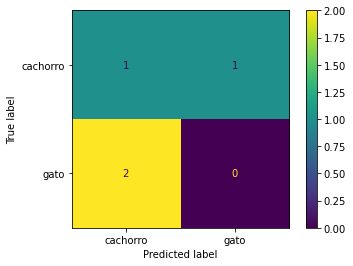

In [25]:
cm = confusion_matrix(y_real_animais, y_pred_animais, labels = ['cachorro', 'gato'])
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= ['cachorro', 'gato'])
disp.plot()
plt.show()

In [26]:
cm = confusion_matrix(['cachorro', 'gato', 'cachorro', 'gato'], ['gato', 'cachorro', 'cachorro', 'cachorro']).ravel()
cm

array([1, 1, 2, 0], dtype=int64)

In [27]:
tp, fn, fp, tn = confusion_matrix(['cachorro', 'gato', 'cachorro', 'gato'], ['gato', 'cachorro', 'cachorro', 'cachorro']).ravel()
tp, fn, fp, tn

(1, 1, 2, 0)